In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
df = pd.read_csv("space_data.csv")

In [6]:
df.sample(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4678,6859801,K03321.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,...,-176.0,4.570,0.066,-0.044,0.715,0.065,-0.072,290.80301,42.344410,14.874
551,10149023,K01081.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-236.0,4.454,0.048,-0.192,1.053,0.306,-0.122,294.76855,47.132790,15.220
6027,9520443,K02893.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-153.0,4.606,0.027,-0.082,0.747,0.096,-0.052,289.20413,46.133911,15.896
2402,8190354,K02781.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,0,...,-152.0,3.813,0.266,-0.143,2.017,0.496,-0.551,299.05725,44.074902,12.743
4872,4939346,K01873.02,Kepler-328 b,CONFIRMED,CANDIDATE,0.989,0,0,0,0,...,-295.0,4.445,0.052,-0.195,1.069,0.323,-0.129,295.80930,40.008511,15.674
4650,3336476,K03247.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,-400.0,4.089,0.131,-0.145,2.106,0.503,-0.453,289.87814,38.427269,12.417
5694,6611330,K01691.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-185.0,4.554,0.059,-0.110,0.783,0.143,-0.077,293.33807,42.016312,15.838
556,8410727,K01148.02,Kepler-270 c,CONFIRMED,CANDIDATE,0.998,0,0,0,0,...,-133.0,4.202,0.149,-0.122,1.410,0.252,-0.252,282.20010,44.422298,13.908
863,9455556,K01396.02,Kepler-294 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-84.0,4.529,0.018,-0.102,0.903,0.109,-0.043,287.39200,46.059311,15.843
5877,5195945,K03940.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,0,...,-66.0,2.819,0.027,-0.033,5.855,1.057,-0.176,294.31287,40.319721,12.930


In [25]:

drop_cols = [
    'kepid', 'kepoi_name', 'kepler_name',   
    'koi_pdisposition',                     
    'ra', 'dec',                           
    'koi_score',                            
]
error_cols = [col for col in df.columns if col.endswith('_err1') or col.endswith('_err2')]
drop_cols.extend(error_cols)
df= df.drop(columns=drop_cols, errors='ignore')

print("Shape before:", df.shape)
print("Remaining columns:\n", df_cleaned.columns.tolist())


Shape before: (9564, 20)
Remaining columns:
 ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']


In [26]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,15.347
2,CANDIDATE,0,0,0,0,19.899140,175.850252,0.969,1.78220,10800.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,15.509


In [27]:
df.isnull().sum()

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_time0bk            0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_model_snr        363
koi_tce_plnt_num     346
koi_tce_delivname    346
koi_steff            363
koi_slogg            363
koi_srad             363
koi_kepmag             1
dtype: int64

In [29]:
df = df.drop(columns=['koi_time0bk', 'koi_tce_plnt_num', 'koi_tce_delivname'], errors='ignore')

print("Final feature set:\n", df.columns.tolist())


Final feature set:
 ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']


koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64
After filtering:
label
0    4839
1    2746
Name: count, dtype: int64


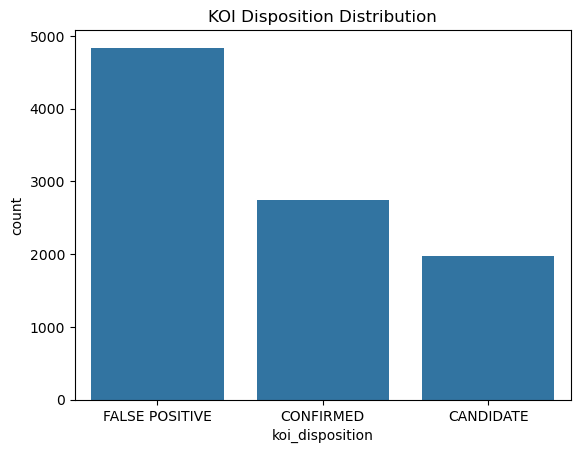

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['koi_disposition'].value_counts())
sns.countplot(data=df, x='koi_disposition', order=df['koi_disposition'].value_counts().index)
plt.title("KOI Disposition Distribution")
df= df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()
df['label'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
print("After filtering:")
print(df['label'].value_counts())

In [40]:
df.sample(5)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,label
6149,FALSE POSITIVE,0,1,1,1,2.845736,1.294,11.5703,3130.0,402.16,3058.0,20649.68,297.8,4878.0,2.745,10.154,12.367,0
3255,CONFIRMED,0,0,0,0,5.378868,0.758,2.7222,483.0,1.86,833.0,113.59,60.6,5077.0,4.567,0.774,14.005,1
2839,CONFIRMED,0,0,0,0,5.458499,0.650,4.0448,256.0,1.91,1099.0,344.32,72.0,5914.0,4.396,1.135,13.046,1
2585,CONFIRMED,0,0,0,0,59.496901,0.406,5.4040,1260.0,2.92,369.0,4.36,23.2,4817.0,4.499,0.833,15.768,1
8057,CONFIRMED,0,0,0,0,10.692115,0.734,4.6570,408.0,2.71,1008.0,244.47,9.4,6474.0,4.311,1.242,14.294,1


In [41]:
df= df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()
df['label'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
df= df.drop(columns=['koi_disposition'])

print("Final dataset shape:", df.shape)
print("Class balance:\n", df['label'].value_counts())


Final dataset shape: (7585, 17)
Class balance:
 label
0    4839
1    2746
Name: count, dtype: int64


In [42]:
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,label
0,0,0,0,0,9.488036,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,15.347,1
1,0,0,0,0,54.418383,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,15.347,1
3,0,1,0,0,1.736952,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,15.597,0
4,0,0,0,0,2.525592,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,15.509,1
5,0,0,0,0,11.094321,0.538,4.59450,1520.0,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,15.714,1


In [49]:
df.sample(10)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,label
6737,0,1,0,0,25.285232,1.208,4.76313,63000.0,69.68,740.0,70.73,5902.4,6486.0,4.337,1.136,12.138,0
7551,1,0,0,0,209.000550,NaN,2.52000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.334,0
6095,1,0,0,0,634.847390,0.565,16.18600,543.0,20.50,464.0,10.97,15.7,5048.0,2.978,8.611,12.532,0
942,0,0,1,0,2.102417,1.236,1.76840,1500.0,29.29,1435.0,1003.06,94.3,5999.0,4.494,0.959,15.642,0
2042,0,0,0,0,6.238535,0.008,3.52550,402.0,2.53,1185.0,465.61,274.5,6267.0,4.280,1.258,10.734,1
8279,0,1,0,0,26.718418,1.069,8.14155,73000.0,66.69,727.0,65.88,2173.1,5957.0,4.168,1.286,13.144,0
5465,1,0,0,0,53.556625,0.879,16.18000,3960.0,26.31,1076.0,317.03,22.1,7643.0,3.639,3.618,11.142,0
1606,0,0,0,0,12.184200,0.746,2.50140,499.0,2.59,819.0,106.52,23.3,5771.0,4.374,1.068,13.982,1
8300,0,1,0,0,6.855625,0.877,3.02199,70900.0,33.93,987.0,224.32,1397.7,6109.0,4.476,0.931,14.767,0
5467,0,0,0,0,1.210694,0.597,1.43400,159.0,0.99,1351.0,784.51,41.6,5014.0,4.559,0.756,12.914,1


In [50]:
df.isnull().sum()

koi_fpflag_nt      0
koi_fpflag_ss      0
koi_fpflag_co      0
koi_fpflag_ec      0
koi_period         0
koi_impact       259
koi_duration       0
koi_depth        259
koi_prad         259
koi_teq          259
koi_insol        219
koi_model_snr    259
koi_steff        259
koi_slogg        259
koi_srad         259
koi_kepmag         1
label              0
dtype: int64

In [51]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    if col != 'label': 
        df[col] = df[col].fillna(df[col].median())

print("✅ Remaining NaNs after fixing:", df.isnull().sum().sum())


✅ Remaining NaNs after fixing: 0


In [52]:
df.to_csv("cleaned_data.csv", index=False)

C:\Users\shivam\AppData\Local\Temp\ipykernel_1580\1389130514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


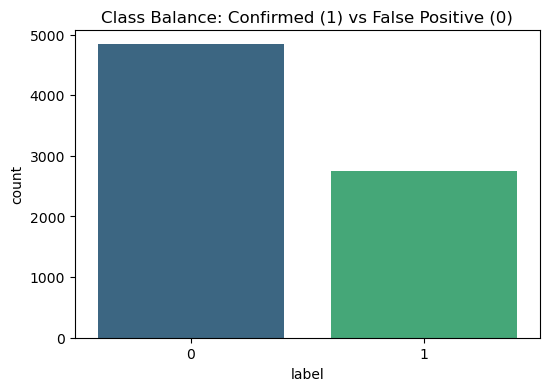

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title("Class Balance: Confirmed (1) vs False Positive (0)")
plt.show()


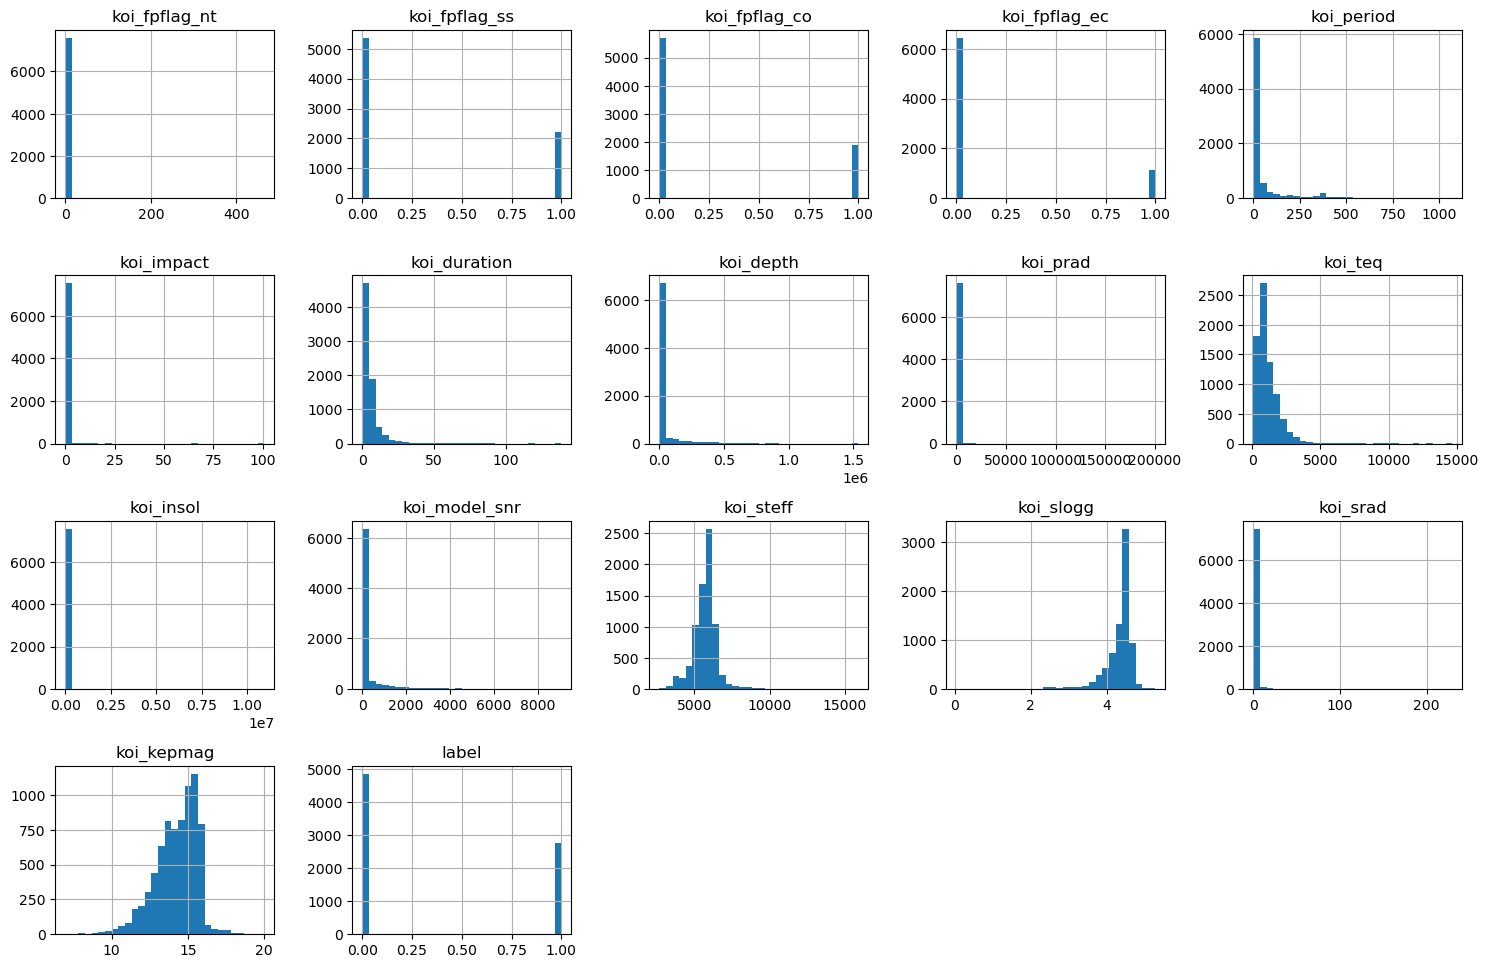

In [55]:
df.hist(bins=30, figsize=(15,12), layout=(5,5))
plt.tight_layout()
plt.show()


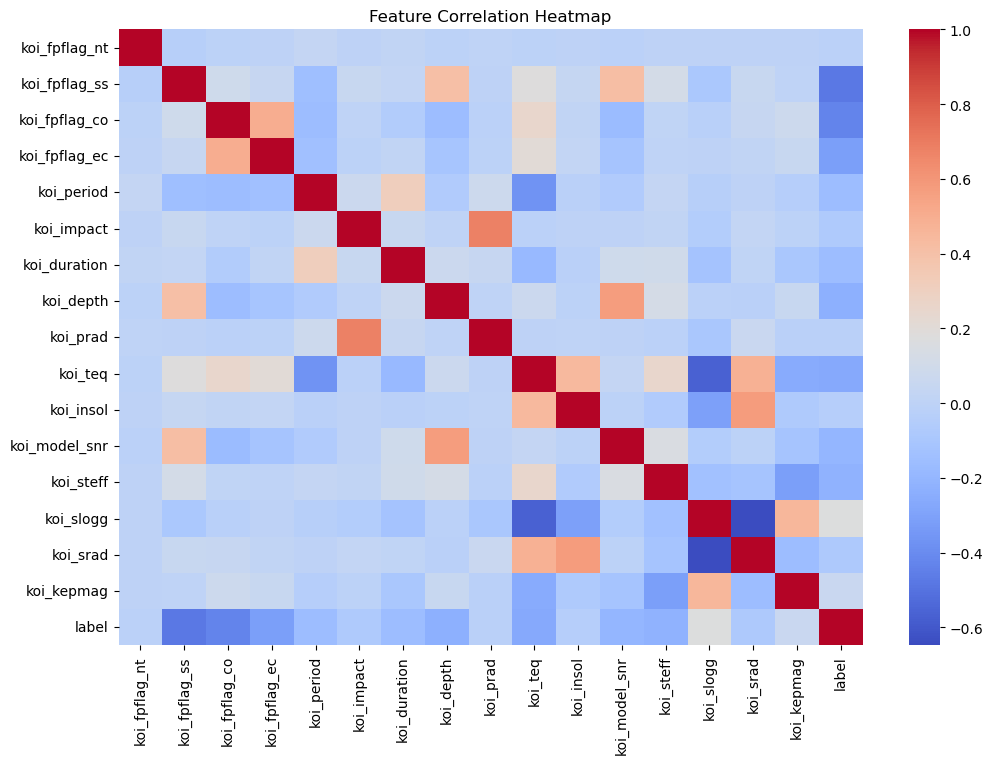

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


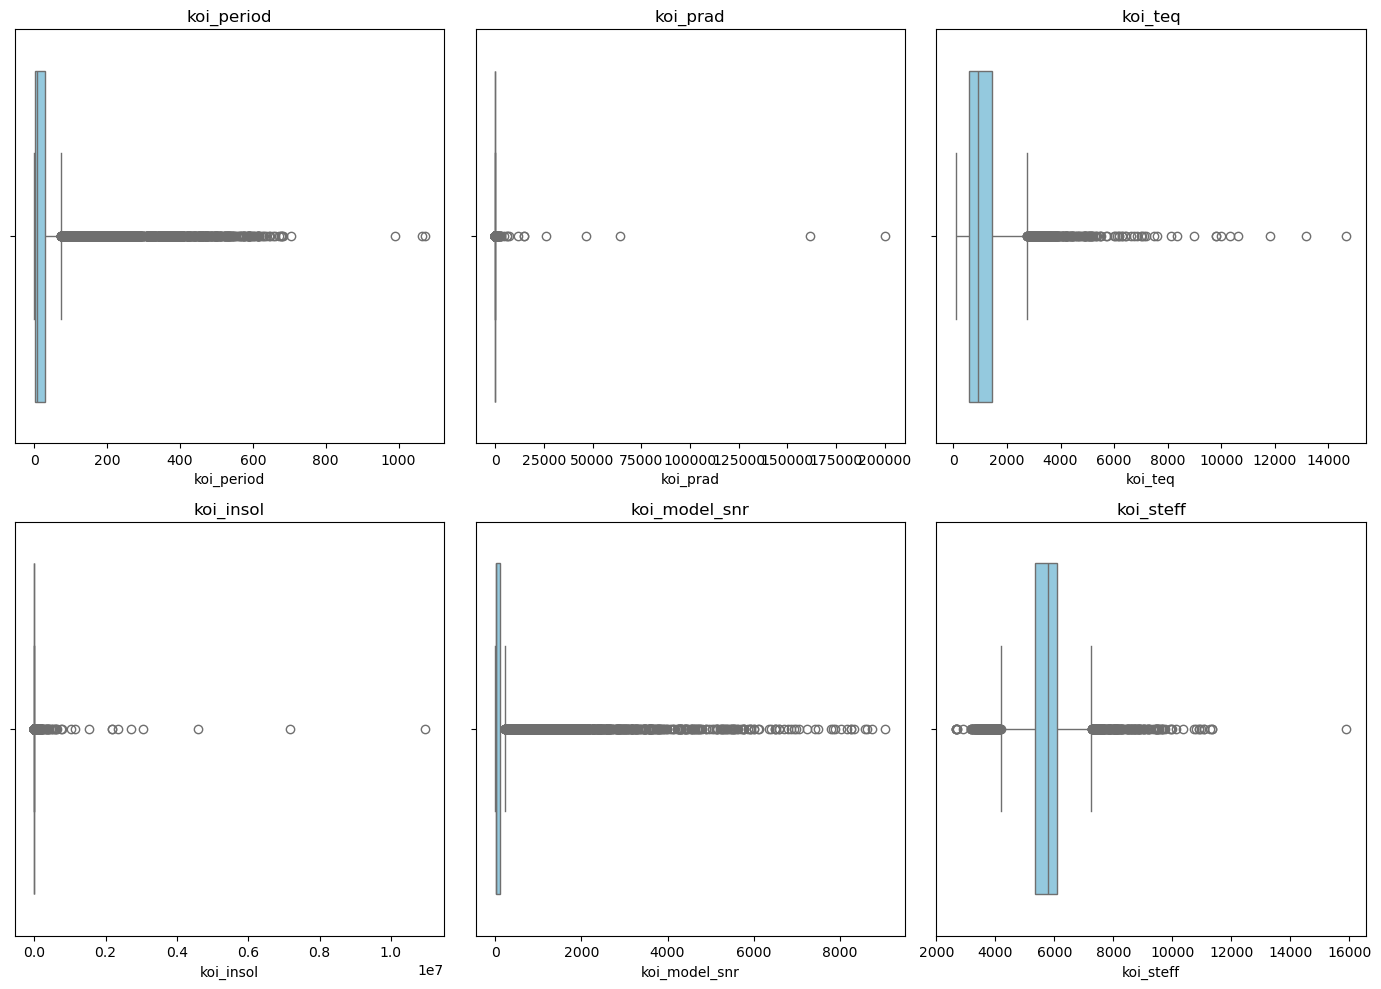

In [57]:
plt.figure(figsize=(14,10))
for i, col in enumerate(['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff']):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [58]:
import numpy as np

skewed_features = ['koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr']
for col in skewed_features:
    df[col] = np.log1p(df[col])


In [59]:
def cap_outliers(df, col):
    lower, upper = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

for col in ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr']:
    cap_outliers(df, col)


In [60]:
from sklearn.preprocessing import StandardScaler

features = df.drop('label', axis=1).columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [63]:
df.sample(30)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,label
8704,-0.049123,1.552585,-0.575879,2.367941,-0.392191,-0.015700,-0.650486,-0.315687,-0.966428,-0.927026,-0.983706,-1.036350,-2.221916,0.906009,-0.190674,0.611992,0
4144,-0.049123,-0.644087,-0.575879,-0.422308,-0.417934,-0.123618,-0.462522,-0.315565,-0.818574,0.058678,0.027226,-0.872458,0.151582,0.552736,-0.142230,1.063115,1
6842,-0.049123,-0.644087,-0.575879,-0.422308,1.610803,-0.232810,0.987719,-0.314105,-0.524497,-1.362703,-1.386077,-0.250916,0.439730,-0.423415,-0.071428,-0.827033,1
3875,-0.049123,-0.644087,-0.575879,2.367941,-0.456293,-0.161819,-0.334624,-0.317687,-0.714947,1.658652,1.703331,-0.808663,1.119114,-1.387945,0.214372,-0.674993,0
2624,-0.049123,-0.644087,-0.575879,-0.422308,1.708256,-0.230900,0.183413,-0.308311,-0.493387,-1.848852,-1.740885,-0.399280,-0.367582,0.385395,-0.136398,0.253663,1
5565,-0.049123,1.552585,-0.575879,-0.422308,-0.450296,1.432440,-0.531745,-0.039440,2.634129,-0.041357,-0.078098,0.288363,-1.417088,0.866498,-0.189540,1.195882,0
1962,-0.049123,-0.644087,-0.575879,-0.422308,-0.442115,-0.167868,-0.409634,-0.315866,-0.720485,0.562460,0.552658,-0.450519,0.175180,0.046067,-0.091519,0.421407,1
2435,-0.049123,-0.644087,1.736477,2.367941,-0.465327,-0.229626,-0.555611,-0.314462,2.119829,2.312480,2.406550,-0.049911,-2.316310,-7.956043,12.498428,-0.308813,0
1814,-0.049123,-0.644087,-0.575879,-0.422308,-0.408559,-0.066635,-0.584267,-0.317080,-0.793544,0.382929,0.366304,-0.655948,0.553996,-0.204943,-0.045505,-1.166089,1
3695,-0.049123,-0.644087,1.736477,-0.422308,0.405239,0.072163,0.262086,-0.313136,0.103392,-0.604154,-0.659857,-0.570736,0.077061,-1.362379,0.121697,-0.223157,0


In [64]:
df.to_csv("Scaled_cleaned_data.csv", index=False)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1️⃣ Load your data
# If you already have it as a DataFrame 'df', skip this
# df = pd.read_csv('your_data.csv', sep='\t')  # adjust if tab-separated

# 2️⃣ Split features and target
X = df.drop(columns=['label'])
y = df['label']

# 3️⃣ Train-test split (stratified to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Logistic Regression baseline
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# 6️⃣ Random Forest baseline
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Logistic Regression ===
Accuracy: 0.984179301252472
Precision: 0.9712746858168761
Recall: 0.9854280510018215
F1 Score: 0.9783001808318263
Confusion Matrix:
 [[952  16]
 [  8 541]]

=== Random Forest ===
Accuracy: 0.994726433750824
Precision: 0.9963302752293578
Recall: 0.9890710382513661
F1 Score: 0.9926873857404022
Confusion Matrix:
 [[966   2]
 [  6 543]]


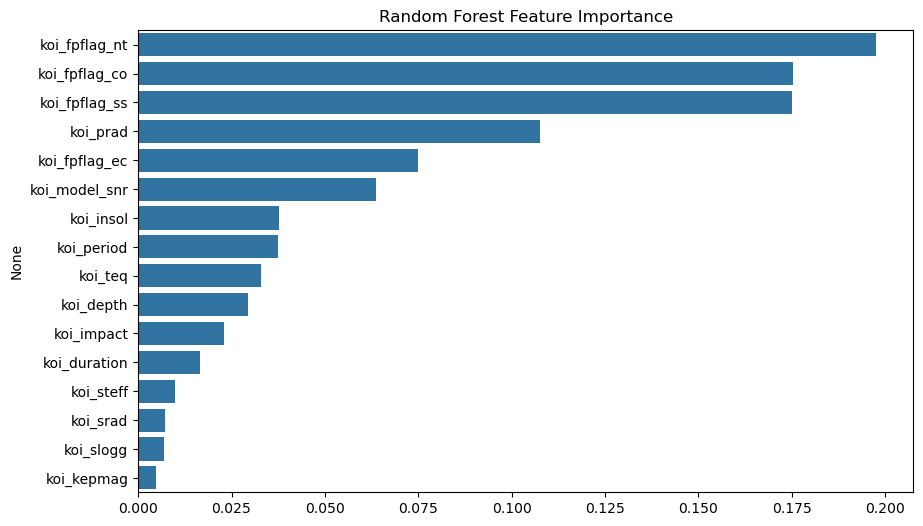

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Random Forest Feature Importance")
plt.show()


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']
X_train_full, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

required_features = [
    "koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co","koi_fpflag_ec",
    "koi_period","koi_impact","koi_duration","koi_depth","koi_prad",
    "koi_teq","koi_insol","koi_model_snr","koi_steff","koi_slogg",
    "koi_srad","koi_kepmag"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), required_features)
    ],
    remainder="drop"  
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
])

pipeline.fit(X_train_full, y_train)  

joblib.dump(pipeline, "rf_pipeline.pkl")
print("✅ Pipeline saved as rf_pipeline_auto.pkl (auto-selects features)")

✅ Pipeline saved as rf_pipeline_auto.pkl (auto-selects features)


In [75]:
df.sample(10)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,label
4585,0.137737,-0.644087,1.736477,-0.422308,-0.288918,-0.083189,0.967795,-0.317422,-0.844502,-0.021147,-0.055918,-0.800063,0.592498,-0.565189,-0.017800,-1.428769,0
1872,-0.049123,-0.644087,-0.575879,-0.422308,-0.453534,0.068661,-0.456662,-0.317264,-0.766384,0.969168,0.980472,-0.482918,0.454634,-0.258399,-0.059763,-1.452324,1
2386,-0.049123,-0.644087,-0.575879,-0.422308,-0.284269,0.052107,-0.153692,-0.315932,-0.588727,-0.256019,-0.302037,-0.573691,0.272058,-0.149163,-0.070618,-0.393042,1
8411,-0.049123,1.552585,-0.575879,-0.422308,-0.465793,0.070252,-0.435346,0.786192,1.450249,1.259381,1.285300,1.299730,0.484443,0.362154,-0.118252,-0.557930,0
9309,0.137737,-0.644087,-0.575879,-0.422308,3.763647,0.016453,-0.087633,-0.314194,-0.076322,-1.171642,-1.217179,-0.887028,1.325290,-1.225253,0.145190,-1.329550,0
2597,-0.049123,-0.644087,-0.575879,-0.422308,-0.434684,0.040010,-0.496526,-0.316077,-0.910087,-0.285634,-0.330943,-0.205156,-1.515207,0.803746,-0.176902,-0.710684,1
8782,-0.049123,1.552585,-0.575879,-0.422308,-0.433796,0.074391,-0.075122,0.466413,1.101436,0.041123,0.008344,0.786451,-0.317901,0.727048,-0.165075,0.691224,0
3570,-0.049123,-0.644087,-0.575879,-0.422308,-0.052912,-0.218803,0.010466,-0.248801,0.148197,-0.838158,-0.895692,1.046443,0.407438,0.397016,-0.122302,0.297919,1
1071,-0.049123,-0.644087,-0.575879,-0.422308,-0.442826,-0.075867,-0.523028,-0.312935,-0.693211,0.137503,0.108374,-0.553293,-0.763786,0.573653,-0.152275,1.113795,1
545,-0.049123,1.552585,-0.575879,-0.422308,-0.415008,-0.129667,0.267414,0.209029,0.782609,0.114744,0.084539,2.403829,0.397502,0.485335,-0.134291,1.012435,0
